In [5]:
%load_ext jupyter_black

## EDA
- Download Data
- Visualize data w/ labels
- Histogram of label occurrence
- TIF data transformation --> shape

In [41]:
from src.utils import download_competition_data, band_plot

In [2]:
download_competition_data(competition_name = "beyond-visible-spectrum-ai-for-agriculture-2023-p2", 
                          input_folder = './data/input/')

Removed existing version


  0%|          | 0.00/1.60G [00:00<?, ?B/s]

### Visualize data with labels

In [33]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Specify the directory path
directory_path = "data/input/beyond-visible-spectrum-ai-for-agriculture-2023-p2"

# Get a list of all files in the directory
bands_10m = ["B2", "B3", "B4", "B8"]

bands_20m = [
    "B5",
    "B6",
    "B7",
    "B8A",
    "B11",
    "B12",
]

bands_60m = [
    "B1",
    "B9",
]

# Load the images
images_10m = [Image.open(f"{directory_path}/{name}.tif") for name in bands_10m]
images_20m = [Image.open(f"{directory_path}/{name}.tif") for name in bands_20m]
images_60m = [Image.open(f"{directory_path}/{name}.tif") for name in bands_60m]

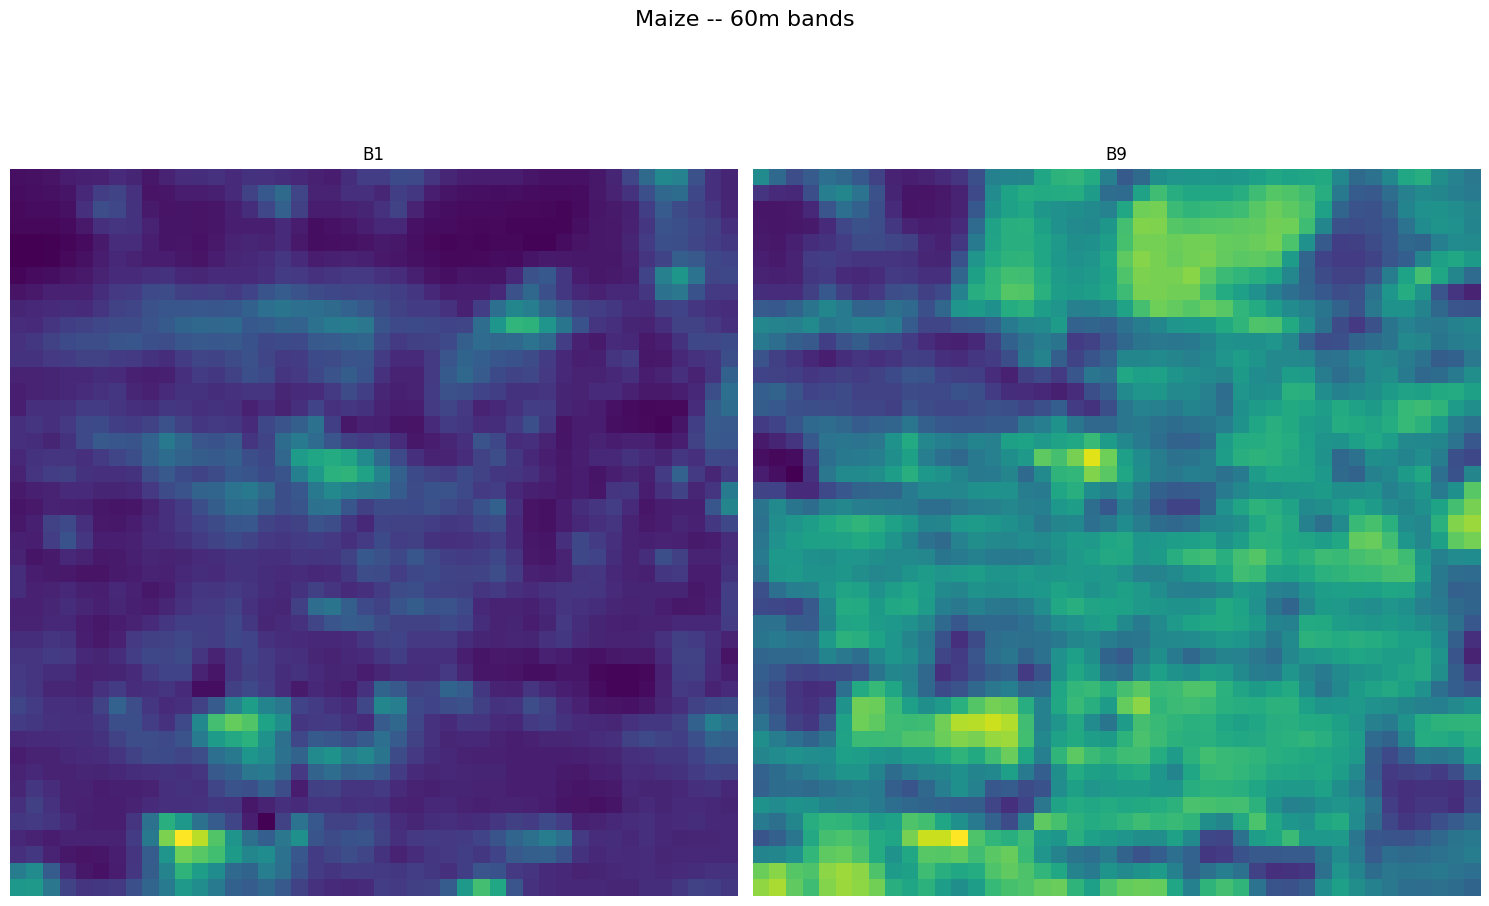

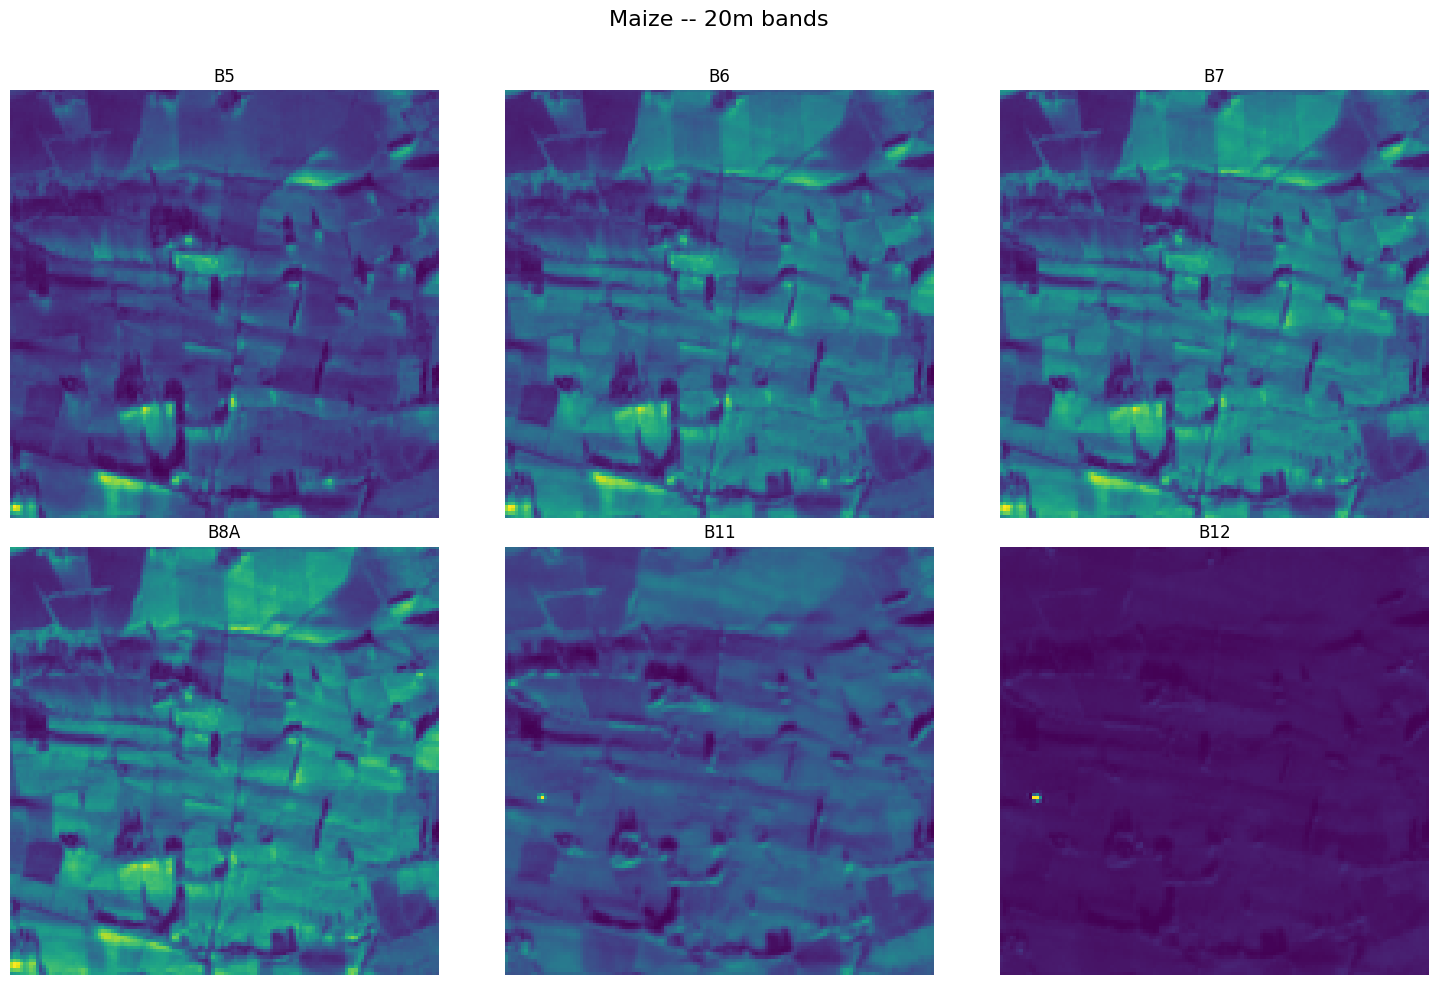

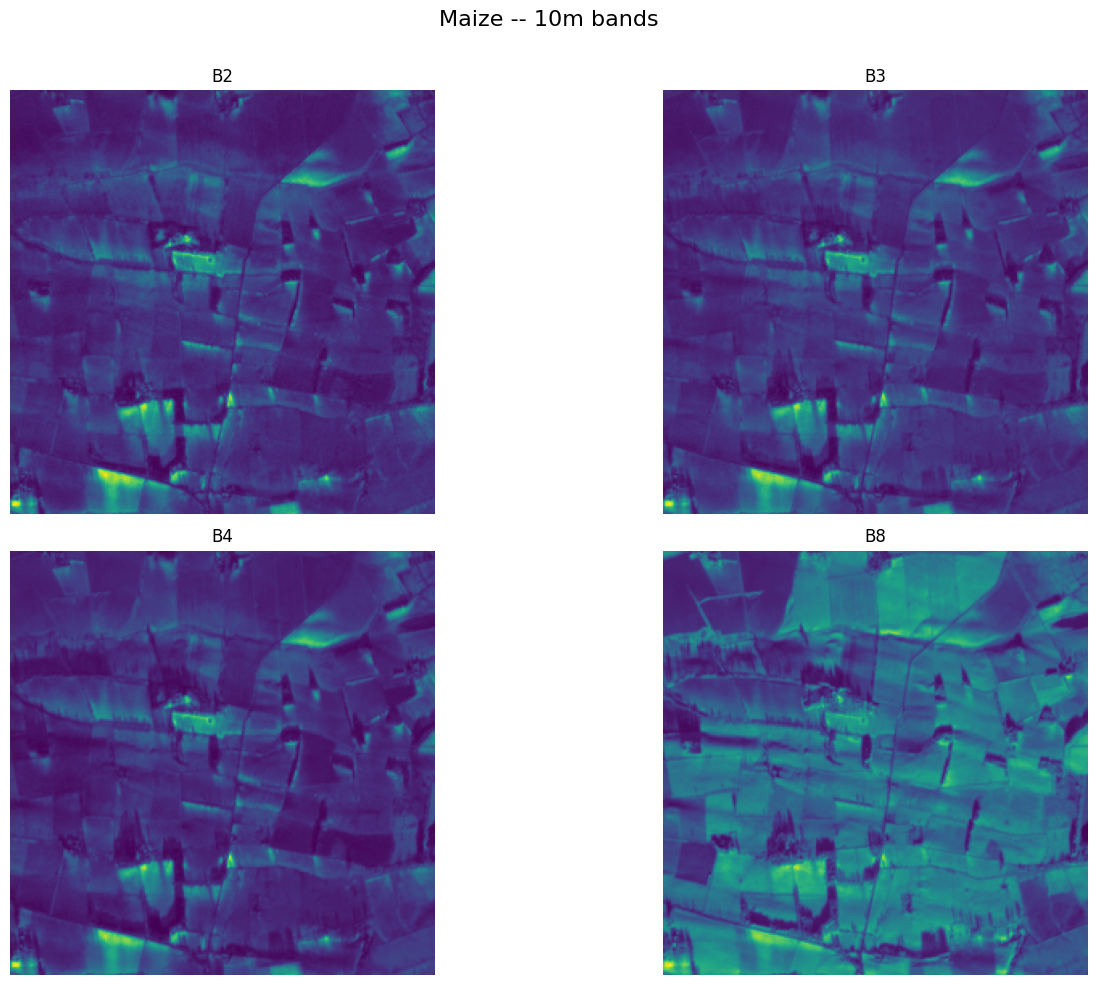

In [47]:
band_plot(
    images=images_60m,
    names=bands_60m,
    num_rows=1,
    num_cols=2,
    title="Maize -- 60m bands",
)
band_plot(
    images=images_20m,
    names=bands_20m,
    num_rows=2,
    num_cols=3,
    title="Maize -- 20m bands",
)

band_plot(
    images=images_10m,
    names=bands_10m,
    num_rows=2,
    num_cols=2,
    title="Maize -- 10m bands",
)

In [40]:
import torch

# Get dimensions
dimension_dict = {}
for i, image in enumerate(images_10m + images_20m + images_60m):
    image_array = np.array(image).astype(np.uint8)
    image_tensor = torch.from_numpy(image_array)
    dimension_dict[file_names[i]] = image_tensor.shape

dimension_dict

{'B1': torch.Size([44, 44]),
 'B2': torch.Size([264, 264]),
 'B3': torch.Size([264, 264]),
 'B4': torch.Size([264, 264]),
 'B5': torch.Size([132, 132]),
 'B6': torch.Size([132, 132]),
 'B7': torch.Size([132, 132]),
 'B8': torch.Size([264, 264]),
 'B8A': torch.Size([132, 132]),
 'B9': torch.Size([44, 44]),
 'B11': torch.Size([132, 132]),
 'B12': torch.Size([132, 132])}

The data has different resolutions and spectral bands.

Spatial Resolution
- 4 bands at 10 m (B2, B3, B4, B8)
- 6 bands at 20 m (B5, B6, B7, B8A, B11, B12)
- 3 bands at 60 m (B1, B9)

EPSG:32630

Pixel Values: [0, 65535]

Dimensions differ based on spatial resolution. What are the bands??